In [57]:
import pandas as pd
import numpy as np

In [58]:
df = pd.read_csv('Datasets/IRIS.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [59]:
df.shape

(150, 5)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [61]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [62]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

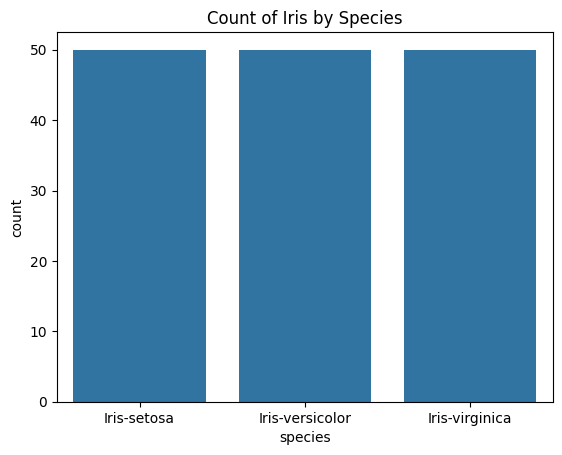

In [64]:
sns.countplot(x = df['species'])
plt.title('Count of Iris by Species')
plt.show()

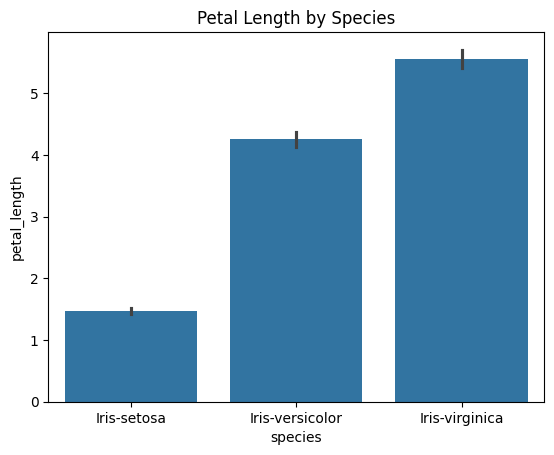

In [65]:
sns.barplot(x = df['species'], y = df['petal_length'])
plt.title('Petal Length by Species')
plt.show()

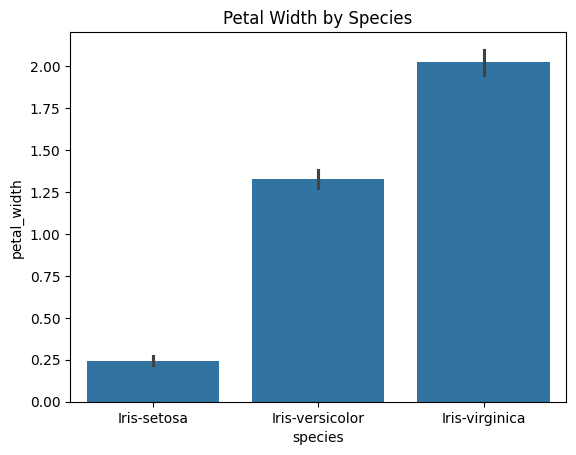

In [66]:
sns.barplot(x = df['species'], y = df['petal_width'])
plt.title('Petal Width by Species')
plt.show()

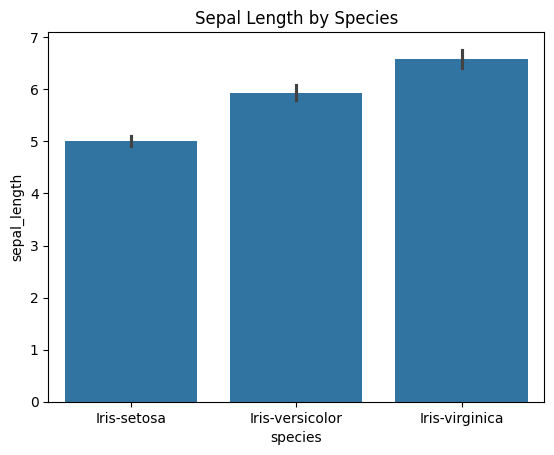

In [67]:
sns.barplot(x = df['species'], y = df['sepal_length'])
plt.title('Sepal Length by Species')
plt.show()

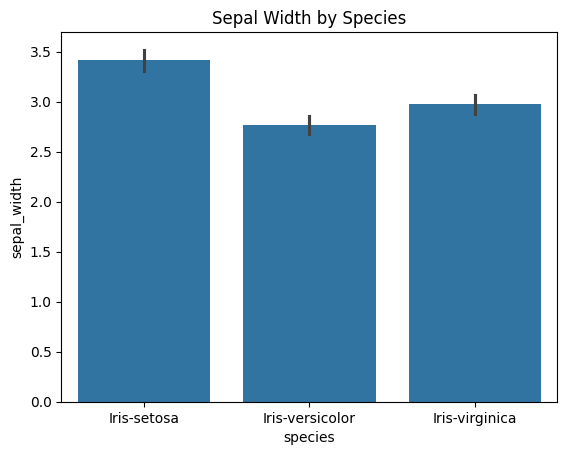

In [68]:
sns.barplot(x = df['species'], y = df['sepal_width'])
plt.title('Sepal Width by Species')
plt.show()

Model Training

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [70]:
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [71]:
X = df.drop('species', axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [73]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


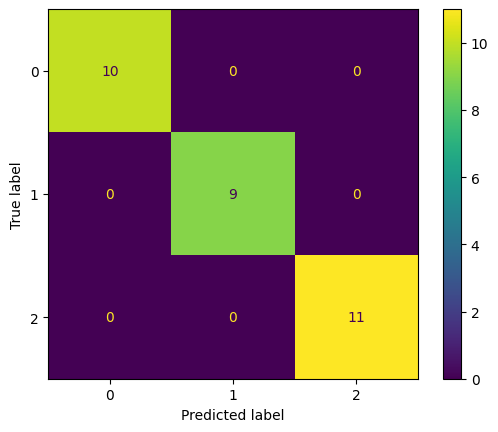

In [75]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

In [76]:
import joblib

# Save the model
joblib.dump(model, 'iris_dt_model.pkl')

['iris_dt_model.pkl']

GUI

In [79]:
import tkinter as tk
from tkinter import messagebox
import joblib
import numpy as np

# Load the trained model
model = joblib.load('iris_dt_model.pkl')

# Function to predict the species
def predict_species():
    try:
        sepal_length = float(entry_sepal_length.get())
        sepal_width = float(entry_sepal_width.get())
        petal_length = float(entry_petal_length.get())
        petal_width = float(entry_petal_width.get())
        
        # Create a DataFrame with the input features
        features = pd.DataFrame({
            'sepal_length': [sepal_length],
            'sepal_width': [sepal_width],
            'petal_length': [petal_length],
            'petal_width': [petal_width]
        })
        
        prediction = model.predict(features)
        species = label_encoder.inverse_transform(prediction)[0]
        
        messagebox.showinfo("Prediction", f"The predicted species is: {species}")
    except ValueError:
        messagebox.showerror("Invalid input", "Please enter valid numeric values.")

# Create the main window
root = tk.Tk()
root.title("Iris Species Predictor")
root.geometry("400x300")  # Set the window size

# Add padding around all widgets
pad_x = 10
pad_y = 10

# Create and place the labels and entry widgets with padding
tk.Label(root, text="Sepal Length").grid(row=0, column=0, padx=pad_x, pady=pad_y, sticky='e')
entry_sepal_length = tk.Entry(root)
entry_sepal_length.grid(row=0, column=1, padx=pad_x, pady=pad_y)

tk.Label(root, text="Sepal Width").grid(row=1, column=0, padx=pad_x, pady=pad_y, sticky='e')
entry_sepal_width = tk.Entry(root)
entry_sepal_width.grid(row=1, column=1, padx=pad_x, pady=pad_y)

tk.Label(root, text="Petal Length").grid(row=2, column=0, padx=pad_x, pady=pad_y, sticky='e')
entry_petal_length = tk.Entry(root)
entry_petal_length.grid(row=2, column=1, padx=pad_x, pady=pad_y)

tk.Label(root, text="Petal Width").grid(row=3, column=0, padx=pad_x, pady=pad_y, sticky='e')
entry_petal_width = tk.Entry(root)
entry_petal_width.grid(row=3, column=1, padx=pad_x, pady=pad_y)

# Create and place the predict button with padding
predict_button = tk.Button(root, text="Predict Species", command=predict_species)
predict_button.grid(row=4, column=0, columnspan=2, pady=pad_y)

# Run the main event loop
root.mainloop()